In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from userfunctions import *

In [2]:
#plt.style.use('default')
sns.set()

In [3]:
#загрузили исходные данные
df_raw = pd.read_excel(r'Prioksk_Air_in.xlsx')
#очистили их от того, что не потребуется и что может привести к ошибкам
df = PrepareDataFrame(df_raw.copy())
#создадим копию для удобства
data_total = df.copy()
winter_data, spring_data, summer_data, autumn_data = PrepareSeasonalDataFrame(df.copy())

Некорректные строки удалены:

        YY  MM  DD  TSP  SO2  SO4   HG   PB   CD  NO2
5187  1998   9  31  NaN  0.0  NaN  NaN  NaN  NaN  NaN


# PB

In [4]:
ELEM_NAME = 'PB'
ELEM = CreateDataBySeasons(ELEM_NAME
                           , data_total, winter_data, spring_data, summer_data, autumn_data
                           , with_zero=True)
VALUES = ExtractValues(ELEM)

if CountZerosInData(VALUES['all'], ELEM_NAME) > 0:
    #НЕ словарь, просто массив по полной выборке соответ-го элемента
    ELEM_NOT_NULL = CreateDataBySeasons(ELEM_NAME
                                        , data_total, winter_data, spring_data, summer_data, autumn_data
                                        , with_zero=False)
    VALUES_NOT_NULL = ExtractValues(ELEM_NOT_NULL)
else:
    VALUES_NOT_NULL = VALUES

Число нулевых элементов в полной выборке PB: 0



Гистограмма для полной выборки PB


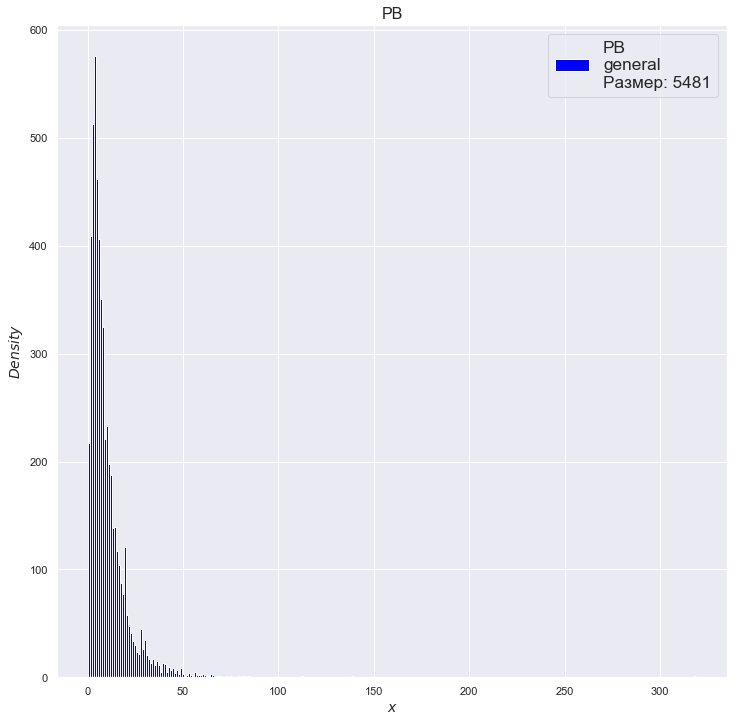

In [5]:
HistOnSample(VALUES['all'],ELEM_NAME)

In [15]:
start = datetime.datetime.now()
distr_ks, params_ks, p_v_ks, distr_chi2, params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL['all'])
print ('\nTook time: {0}'.format(datetime.datetime.now()-start))


Chi2
Best fitting distribution: lognorm
Best p value: 0.13442649566480278
Parameters for the best fit: (0.8535359980165598, -0.47835879292794614, 7.173622479639683)

K-S
Best fitting distribution: genexpon
Best p value: 0.22835875983146642
Parameters for the best fit: (7.819590409637577, 64.77890496865791, 474.9008102626917, 0, 645.0537005609988)

Took time: 0:00:24.829545


In [69]:
distr_params_all = defaultdict(dict)
if p_v_ks >= 0.05:
    distr_params_all['general'][distr_ks] = params_ks
if p_v_chi2 >= 0.05:
    distr_params_all['general'][distr_chi2] = params_chi2

Text(0.5, 1.0, 'PB')

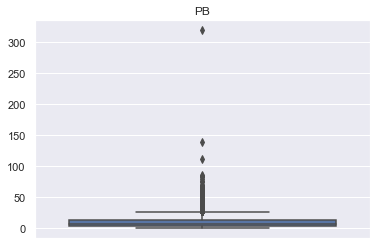

In [6]:
#sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(VALUES['all'],orient='v').set_title(ELEM_NAME)

In [71]:
SizeSample(VALUES['all'], ELEM_NAME)
k = CountZerosInData(VALUES['all'], ELEM_NAME)
CountByTreshold(VALUES['all'], ELEM_NAME, 5 , 0.5)

Размер полной выборки для PB равен 5481
Число нулевых элементов в полной выборке PB: 0

Посмотрим на число элементов выше и ниже некоторых порогов для выборки PB

Порог: 0.0, значений выше: 5481, ниже: 0
Порог: 0.5, значений выше: 5427, ниже: 54
Порог: 1.0, значений выше: 5268, ниже: 213
Порог: 1.5, значений выше: 5120, ниже: 361
Порог: 2.0, значений выше: 4903, ниже: 578
Порог: 2.5, значений выше: 4662, ниже: 819
Порог: 3.0, значений выше: 4387, ниже: 1094
Порог: 3.5, значений выше: 4120, ниже: 1361
Порог: 4.0, значений выше: 3861, ниже: 1620
Порог: 4.5, значений выше: 3614, ниже: 1867
Порог: 5.0, значений выше: 3387, ниже: 2094


Построение графика всей выборки для PB


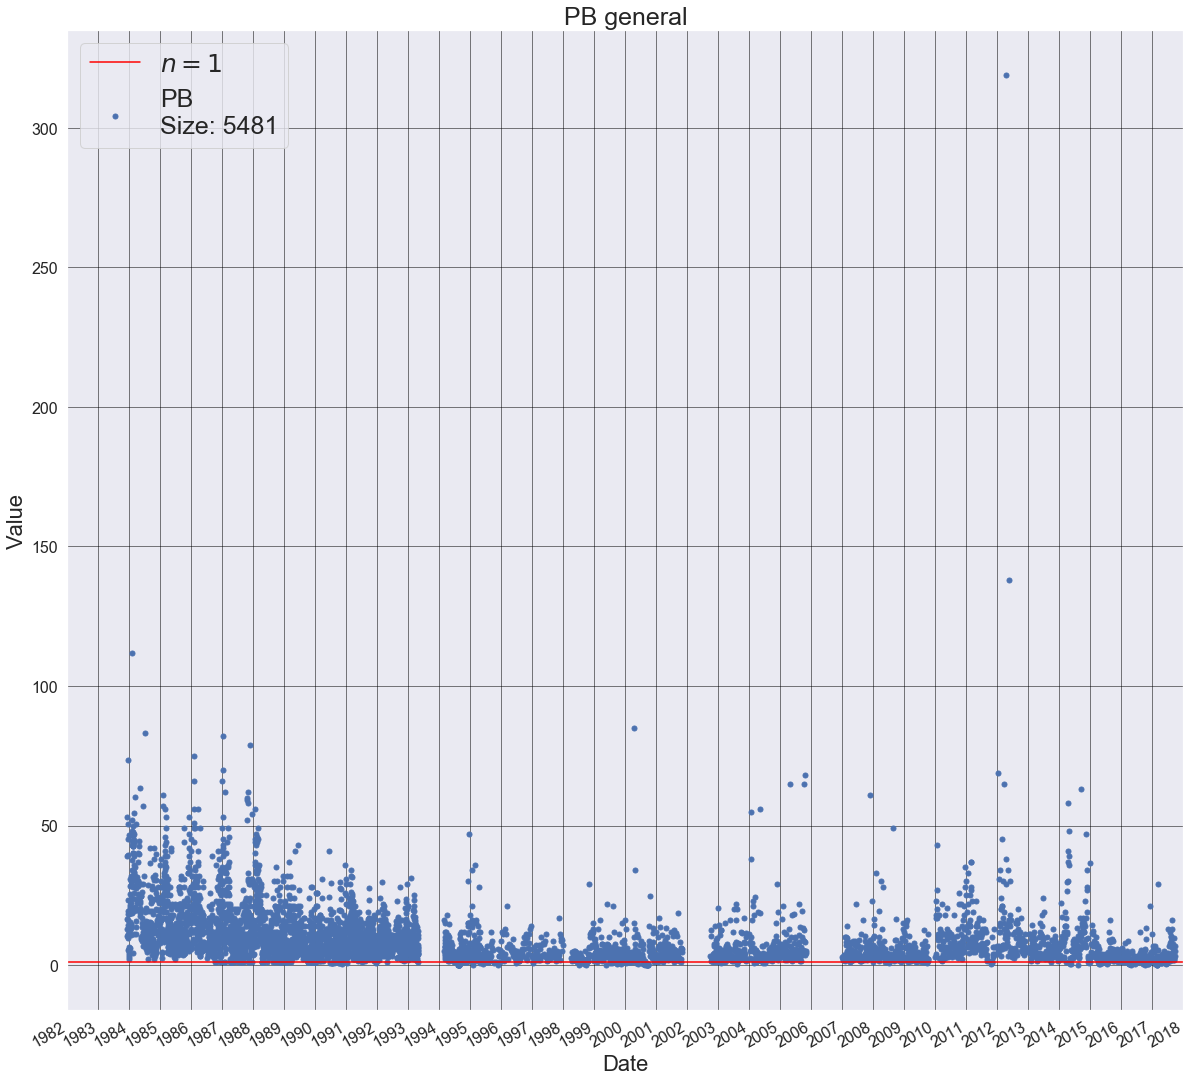

In [74]:
PlotElement(ELEM['all'],ELEM_NAME,'general',20,20,1)

Гистограмма 0-1 теста Колмогорова-Смирнова для выборки PB


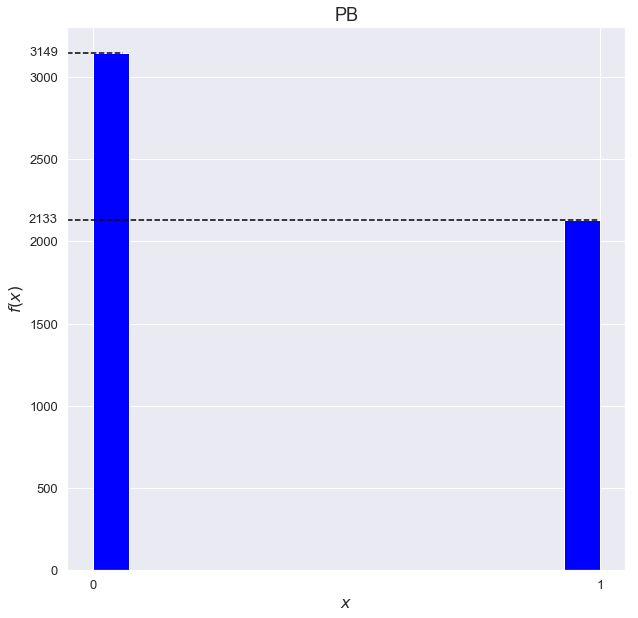

In [75]:
HistOnKSTest2Sample(KSTest2Sample(VALUES['all']), ELEM_NAME)

Принимаем гипотезу однородности К-С, если p-value > 0.05, сопоставляем ей 1, иначе 0
Число подряд идущих 1 - синим цветом, 0 - серым 


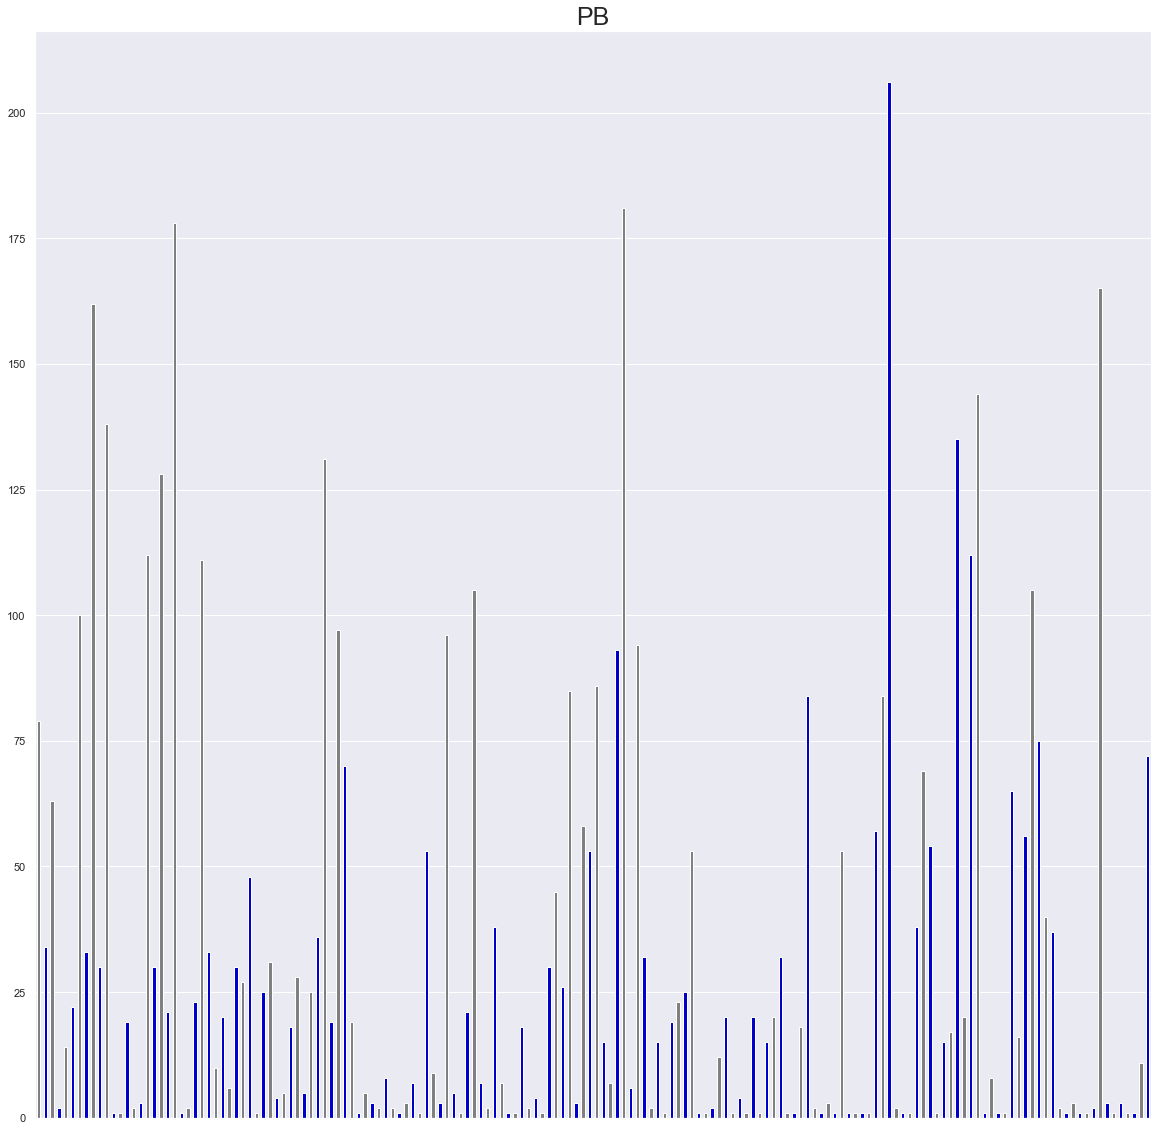

In [76]:
HistOnRepValues(RepeatedValuesCount(KSTest2Sample(VALUES['all'])),ELEM_NAME)

Поделим выборку на train и test (90 к 10), по 1-й оценим параметры, по 2-й проверим гипотезу о согласии К-С и Хи-квадрат для Гамма распределения

In [80]:
#GAMMA

test_size = 0.1

while True: 
    train, test = train_test_split(VALUES_NOT_NULL['all'], test_size=test_size)
    params = FitParams(train,'gamma', floc=0)
    s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params)
    s_ks, p_ks = KSOnTest(test, 'gamma', params)
    if p_chi2 >= 0.05 and p_ks >= 0.1:
        break
#based on chi2 and ks
#PB
print('shape,loc,scale = {0}, p_v on Chi2 = {1}, p_v on KS = {2}'.format(params, p_chi2, p_ks))

shape,loc,scale = (1.3160676583306434, 0, 7.585898072885087), p_v on Chi2 = 0.12268468274089193, p_v on KS = 0.1525753312292229


In [81]:
distr_params_all['general']['gamma'] = params

Гистограмма для выборки PB, сезон - general
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


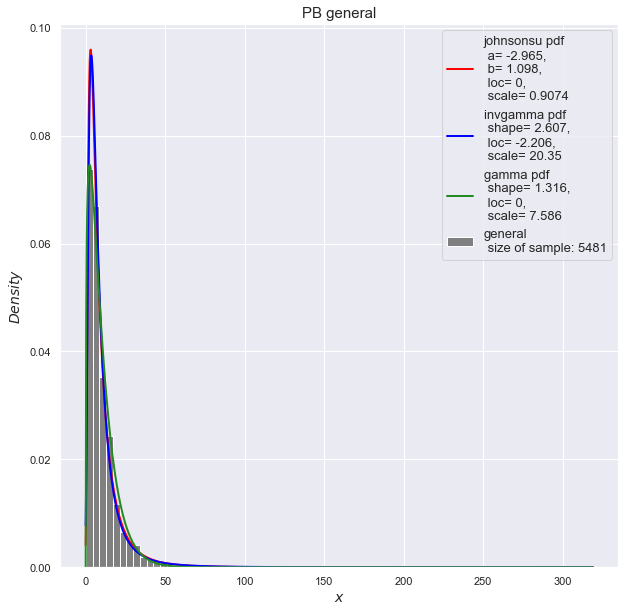

In [129]:
DistributionBySeason(VALUES['all'], ELEM_NAME, 'general', distr_params_all['general'])

In [83]:
distr_params_all

defaultdict(dict,
            {'general': {'johnsonsu': (-2.9650410562691665,
               1.098100133975835,
               0,
               0.9074370092883964),
              'invgamma': (2.6074866083588217,
               -2.2060205786435274,
               20.351127099965836),
              'gamma': (1.3160676583306434, 0, 7.585898072885087)}})

In [84]:
#GAMMA

print('GAMMA\n')

stat, p_v = KSOnTest(test, 'gamma', params)
print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
stat, p_v = ChiSquareOnTest(test, 'gamma', params)
print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))


GAMMA

KS TEST:
Power_divergenceResult(statistic=0.048105067804287804, pvalue=0.1525753312292229)
CHISQARE TEST:
Power_divergenceResult(statistic=27.46486256000875, pvalue=0.12268468274089193)


## Рассмотрим сезонные выборки

In [85]:
params_seasons = {}

In [98]:
#GAMMA

seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons = {}
train_test_seasons = {}
for s in seasons:
    while True: 
        train, test = train_test_split(VALUES_NOT_NULL[s], test_size=0.2)
        params_seasons[s] = FitParams(train, 'gamma', floc=0)
        s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params_seasons[s])
        s_ks, p_ks = KSOnTest(test, 'gamma', params_seasons[s])
        if p_chi2 >= 0.05 and p_ks >=0.2:
            train_test_seasons[s] = [train, test]
            break
            
for s in seasons:
    print(s, ': ', params_seasons[s])
print('p_v on Chi2 = {0}, p_v on KS = {1}'.format(p_chi2, p_ks))

winter :  (1.1903543030588033, 0, 10.742537432805047)
spring :  (1.3100419320726528, 0, 8.073800470377149)
summer :  (1.5976154918656724, 0, 4.65040966034271)
autumn :  (1.3697338008845075, 0, 6.459425451473247)
p_v on Chi2 = 0.08754376610368211, p_v on KS = 0.24998115318440123


In [16]:
start = datetime.datetime.now()
seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons_ks,params_seasons_chi2 = defaultdict(dict), defaultdict(dict)
train_test_seasons1 = {}
for s in seasons:
    print()
    print(s.upper())
    print()
    distr_ks,params_ks,p_v_ks, distr_chi2,params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL[s])
    if p_v_ks >= 0.05:
        params_seasons_ks[s][distr_ks] = params_ks
    if p_v_chi2 >= 0.05:
        params_seasons_chi2[s][distr_chi2] = params_chi2
print('\nTook time: {0}'.format(datetime.datetime.now()-start))


WINTER


Chi2
Best fitting distribution: recipinvgauss
Best p value: 0.40087393932711457
Parameters for the best fit: (1.7263384504538433, 0, 8.149771396147544)

K-S
Best fitting distribution: recipinvgauss
Best p value: 0.8186033986908375
Parameters for the best fit: (1.7263384504538433, 0, 8.149771396147544)

SPRING


Chi2
Best fitting distribution: lognorm
Best p value: 0.3512433070029988
Parameters for the best fit: (0.9297761184973671, 0.0, 6.95160252776419)

K-S
Best fitting distribution: lognorm
Best p value: 0.9497086878586634
Parameters for the best fit: (0.9297761184973671, 0.0, 6.95160252776419)

SUMMER


Chi2
Best fitting distribution: recipinvgauss
Best p value: 0.1526077937670583
Parameters for the best fit: (0.5906453529315547, -0.9167415268790622, 3.1316719736926055)

K-S
Best fitting distribution: gengamma
Best p value: 0.1124834357014471
Parameters for the best fit: (1.628940000332066, 1.0138427440874984, 0, 4.448311164569462)

AUTUMN


Chi2
Best fitting distribution

In [99]:
distr_params_seasons = defaultdict(dict)
for s in seasons:
    try:
        distr_ks, params_ks = list(params_seasons_ks[s].keys())[0], list(params_seasons_ks[s].values())[0] 
        distr_params_seasons[s][distr_ks] = params_ks
    except IndexError:
        continue
for s in seasons:
    try:
        distr_chi2, params_chi2 = list(params_seasons_chi2[s].keys())[0], list(params_seasons_chi2[s].values())[0] 
        distr_params_seasons[s][distr_chi2] = params_chi2
    except IndexError:
        continue
for s in seasons:
    params_gamma = params_seasons[s]
    distr_params_seasons[s]['gamma'] = params_gamma
    

In [110]:
distr_params_seasons

defaultdict(dict,
            {'winter': {'lognorm': (1.026096253782059, 0.0, 8.136822094571807),
              'recipinvgauss': (1.8588406183712571, 0, 8.397800063531445),
              'gamma': (1.1903543030588033, 0, 10.742537432805047)},
             'spring': {'genexpon': (2.8241809957401014e-08,
               0.4257797811870466,
               3.41987583678302,
               0,
               3.974082937933285),
              'recipinvgauss': (1.1947818373372199,
               -0.3061570296500593,
               5.846157992719354),
              'gamma': (1.3100419320726528, 0, 8.073800470377149)},
             'summer': {'johnsonsu': (-2.5517219128853834,
               1.365995662587241,
               0,
               1.8278368107973026),
              'lognorm': (0.918137664427685, 0.0, 5.35222495478049),
              'gamma': (1.5976154918656724, 0, 4.65040966034271)},
             'autumn': {'powerlognorm': (0.36676410669258774,
               0.5325160413022487,
     

Гистограмма для выборки PB, сезон - winter
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


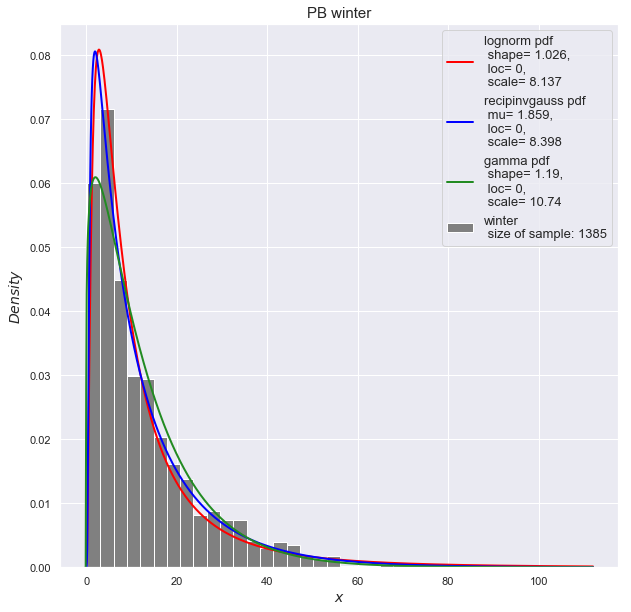

Гистограмма для выборки PB, сезон - spring
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


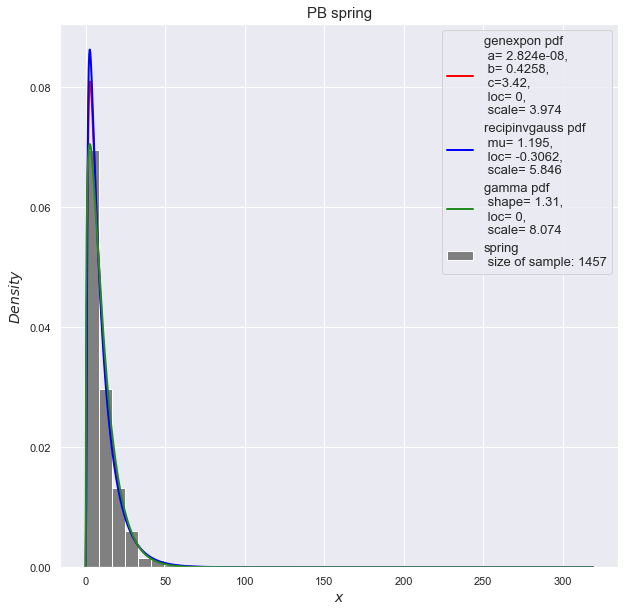

Гистограмма для выборки PB, сезон - summer
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


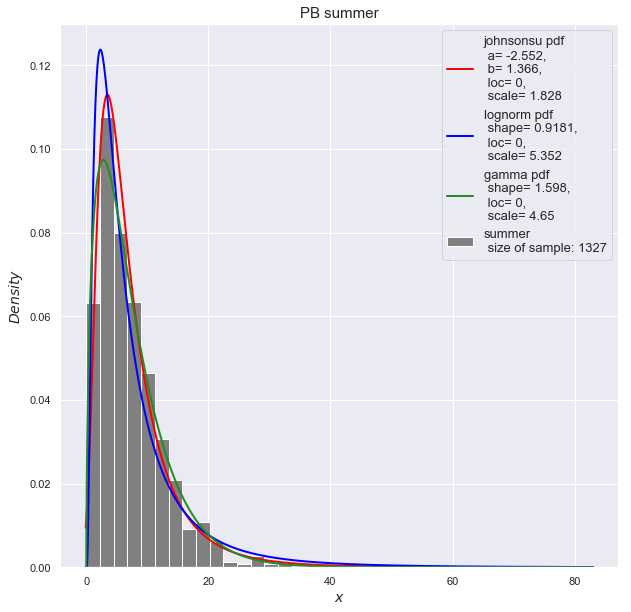

Гистограмма для выборки PB, сезон - autumn
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


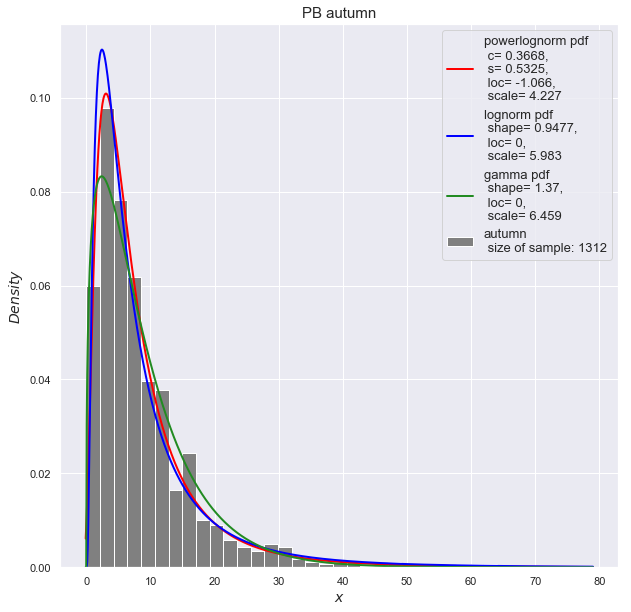

In [130]:
for s in seasons:
    DistributionBySeason(VALUES_NOT_NULL[s], ELEM_NAME, season=s,params_dict=distr_params_seasons[s])

### Проверка гипотезы о согласии Хи-квадрат и К-С для сезонных выборок для Гамма распределения
#### для других подобранных распределений результаты выше

In [92]:
for s in seasons:
    print(s.upper())
    print()
    stat, p_v = KSOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    stat, p_v = ChiSquareOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    print()

WINTER

KS TEST:
Power_divergenceResult(statistic=0.08167462381672835, pvalue=0.0469107468780976)
CHISQARE TEST:
Power_divergenceResult(statistic=21.342701923675605, pvalue=0.06642110897589144)

SPRING

KS TEST:
Power_divergenceResult(statistic=0.05940284317882627, pvalue=0.24480592021230677)
CHISQARE TEST:
Power_divergenceResult(statistic=inf, pvalue=0.0)

SUMMER

KS TEST:
Power_divergenceResult(statistic=0.04305061115689324, pvalue=0.725333739604407)
CHISQARE TEST:
Power_divergenceResult(statistic=71825.2355234378, pvalue=0.0)

AUTUMN

KS TEST:
Power_divergenceResult(statistic=0.04037781022414544, pvalue=0.7845126789575005)
CHISQARE TEST:
Power_divergenceResult(statistic=514.5760512462498, pvalue=1.1712929876964455e-101)



## Нарисуем 4 гамма распределения, полученные в результате работы ЕМ алгоритма
Выборка делилась на 4 части, учитывая след формулу "количество элементов за данное время года / вся выборка"

Использовался метод gammamixEM из R

In [107]:
dic = {'x':VALUES_NOT_NULL['all']}
df = pd.DataFrame(dic, columns=['x'])
df.to_csv('PBall.csv', index=False)

In [95]:
print('PROPORTIONS OF SEASON DATA FROM ALL DATA')
print('WINTER:', len(VALUES['winter'])/len(VALUES['all']), sep=' ')
print('SPRING:', len(VALUES['spring'])/len(VALUES['all']), sep=' ')
print('SUMMER:', len(VALUES['summer'])/len(VALUES['all']), sep=' ')
print('AUTUMN:', len(VALUES['autumn'])/len(VALUES['all']), sep=' ')

PROPORTIONS OF SEASON DATA FROM ALL DATA
WINTER: 0.25269111476008027
SPRING: 0.2658274037584382
SUMMER: 0.2421091041780697
AUTUMN: 0.2393723773034118


Веса: [0.04605934, 0.32319704, 0.31805796, 0.31268566]


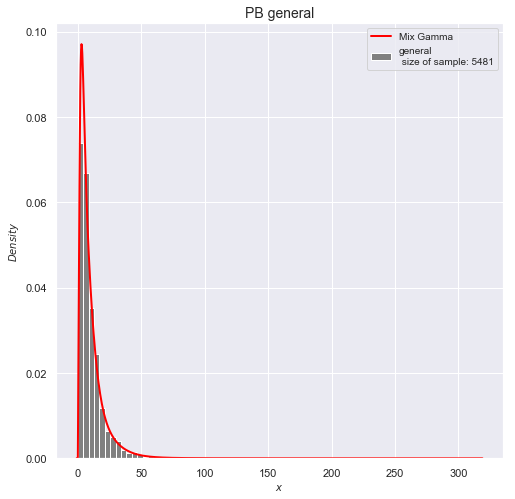

In [19]:
sh_loc_sc1, lamb1 = FormShLocScLamb('0.5404993 1.793695 2.907334 3.397501','31.5366726 8.848304 1.273128 2.681890',
                                   '0.04605934 0.32319704 0.31805796 0.31268566')

x = np.linspace(-1, max(VALUES['all']),1000)

print('Веса: {0}'.format(lamb1))  
fig3 = EMGammaMixPlot_4(sh_loc_sc1, lamb1)
fig3.savefig(ELEM_NAME+'_MixGamma.png', bbox_inches='tight', pad_inches=0)